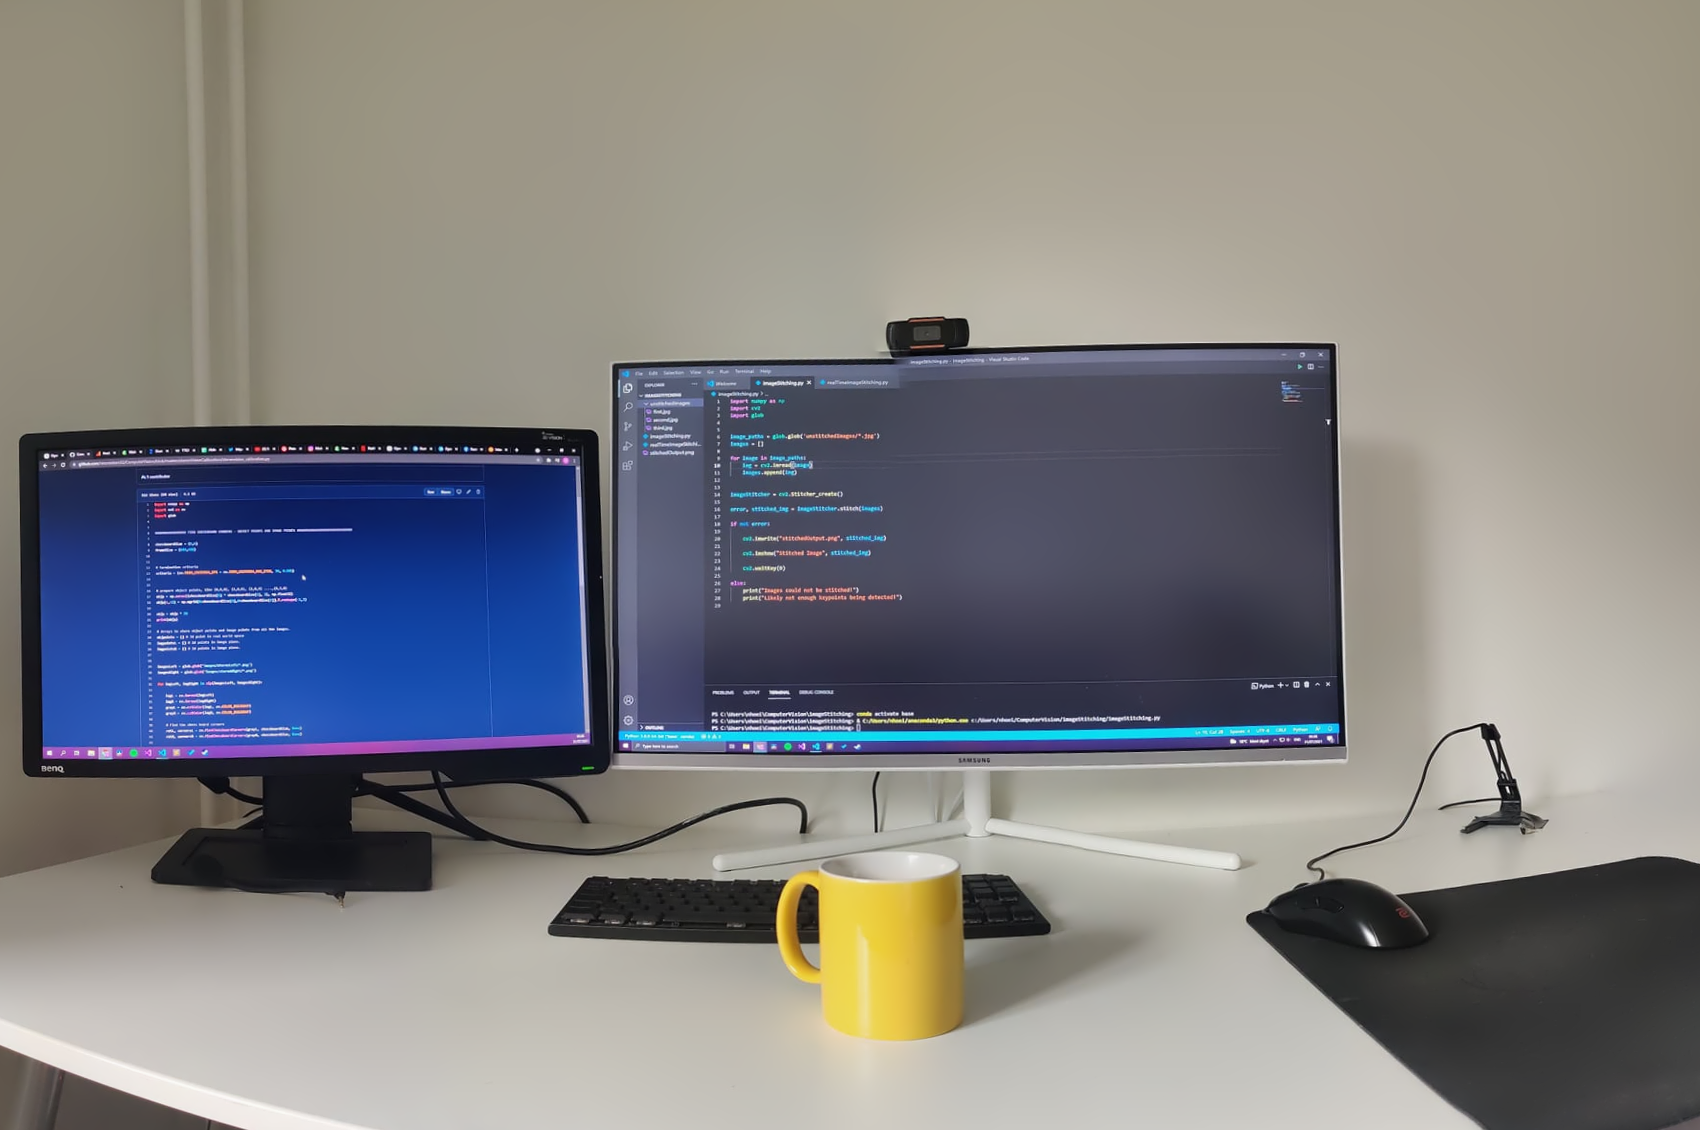

In [4]:

   
import numpy as np
import cv2
import glob
import imutils
from google.colab.patches import cv2_imshow
image_paths = glob.glob('/content/drive/MyDrive/image/*.jpg')
images = []


for image in image_paths:
    img = cv2.imread(image)
    images.append(img)
    


imageStitcher = cv2.Stitcher_create()

error, stitched_img = imageStitcher.stitch(images)

if not error:

    cv2.imwrite("stitchedOutput.png", stitched_img)
    




    stitched_img = cv2.copyMakeBorder(stitched_img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, (0,0,0))

    gray = cv2.cvtColor(stitched_img, cv2.COLOR_BGR2GRAY)
    thresh_img = cv2.threshold(gray, 0, 255 , cv2.THRESH_BINARY)[1]

    
    cv2.imwrite("thresImage.png",thresh_img)

    contours = cv2.findContours(thresh_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    contours=imutils.grab_contours(contours)
    
    areaOI = max(contours, key=cv2.contourArea)

    mask = np.zeros(thresh_img.shape, dtype="uint8")
    x, y, w, h = cv2.boundingRect(areaOI)
    cv2.rectangle(mask, (x,y), (x + w, y + h), 255, -1)

    minRectangle = mask.copy()
    sub = mask.copy()

    while cv2.countNonZero(sub) > 0:
        minRectangle = cv2.erode(minRectangle, None)
        sub = cv2.subtract(minRectangle, thresh_img)

    cv2.imwrite("subImage.png", sub)
    contours = cv2.findContours(minRectangle.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    contours = imutils.grab_contours(contours)
    
    areaOI = max(contours, key=cv2.contourArea)
    
    
    

    x, y, w, h = cv2.boundingRect(areaOI)

    stitched_img = stitched_img[y:y + h, x:x + w]

    cv2.imwrite("stitchedOutputProcessed.png", stitched_img)
    cv2_imshow(stitched_img)
    

    



else:
    print("Images could not be stitched!")
    print("Likely not enough keypoints being detected!")
